In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_risk.csv')

In [3]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
#Categorical - mode/max , numerical - medium
df['education'].fillna(df['education'].value_counts().idxmax(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].value_counts().idxmax(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)

In [5]:
df['sex'] = df.sex.replace(['M','F'],[0,1])
df['is_smoking'] = df.is_smoking.replace(['YES', 'NO'],[1,0])

In [6]:
df.drop(['education'],axis=1,inplace=True)

In [7]:
df.drop(['id'],axis=1,inplace=True)

In [8]:
pd.to_numeric(df.TenYearCHD,errors='coerce')

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [9]:
X=df.drop('TenYearCHD',axis=1)
Y=df['TenYearCHD']

In [10]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify=Y)

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

unique, count = np.unique(y_train, return_counts=True)
y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 2015, 1: 2015}

In [13]:
newX_train, newX_test, newy_train, newy_test = train_test_split(x_train_res,y_train_res, test_size=0.3, random_state=42, stratify=y_train_res)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
newX_train = scale.fit_transform(newX_train)
newX_test = scale.transform(newX_test)

In [15]:
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler()
# X_train = scale.fit_transform(X_train)
# X_test = scale.transform(X_test)

In [16]:
newX_train,newX_test

(array([[0.64864865, 0.        , 0.        , ..., 0.32108765, 0.13333333,
         0.13559322],
        [0.24324324, 1.        , 1.        , ..., 0.26341146, 0.33333333,
         0.13125294],
        [0.81081081, 1.        , 1.        , ..., 0.6048597 , 0.8       ,
         0.92655367],
        ...,
        [0.10810811, 1.        , 0.        , ..., 0.13190628, 0.18666667,
         0.1299435 ],
        [0.21621622, 0.        , 1.        , ..., 0.27364767, 0.46666667,
         0.07627119],
        [0.45945946, 0.        , 1.        , ..., 0.34702233, 0.3082429 ,
         0.07803289]]),
 array([[ 0.54054054,  1.        ,  1.        , ..., -0.00347122,
          0.33333333,  0.0960452 ],
        [ 0.7027027 ,  0.        ,  0.        , ...,  0.38009835,
          0.33333333,  0.13276836],
        [ 0.21621622,  0.        ,  1.        , ...,  0.28348279,
          0.26666667,  0.14124294],
        ...,
        [ 0.48648649,  1.        ,  0.        , ...,  0.11657507,
          0.33333333,  0

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
# X = scale.transform(X)

In [19]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=42)]

In [20]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, newX_train ,newy_train, cv=10)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [21]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.66431095 0.67375887 0.66666667 0.66666667 0.70212766 0.72695035
 0.73404255 0.71631206 0.68794326 0.66666667]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 69.05 %
---------------------------------------------------------------
Cross Validation accuracies for the SVC(kernel='linear') = [0.66431095 0.70212766 0.68439716 0.67375887 0.70921986 0.74113475
 0.73758865 0.69858156 0.69858156 0.67730496]
Acccuracy score of the  SVC(kernel='linear') = 69.87 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.74911661 0.80141844 0.78368794 0.74468085 0.81560284 0.76950355
 0.75531915 0.76595745 0.75531915 0.78014184]
Acccuracy score of the  KNeighborsClassifier() = 77.21 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=42) = [0.85865724 0.84397

In [22]:
# list of models
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]


In [23]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {
    

    'log_reg_hyperparameters': {
        
        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {
        
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {
        
        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {
        
        'n_estimators' : [10, 20, 50, 100]
    }
}

In [24]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)


['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [25]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]
 
    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(newX_train,newy_train)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [26]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
---------------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.699756,{'C': 10}
1,SVC(),0.756832,"{'C': 20, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.769938,{'n_neighbors': 3}
3,RandomForestClassifier(random_state=0),0.864235,{'n_estimators': 100}


In [27]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
---------------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.699756,{'C': 10}
1,SVC(),0.756832,"{'C': 20, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.769938,{'n_neighbors': 3}
3,RandomForestClassifier(random_state=0),0.864235,{'n_estimators': 100}


In [28]:
try_data = pd.DataFrame(newX_test,newy_test)

In [29]:
# try_data.head()
try_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
TenYearCHD,,,,,,,,,,,,,,
0,0.162162,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.130977,0.257698,0.253968,0.143477,0.466667,0.192090
1,0.459459,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.364492,0.135320,0.309931,0.188276,0.384188,0.144448
0,0.486486,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.272349,0.120574,0.232804,0.116575,0.333333,0.104520
0,0.594595,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.351351,0.191500,0.306878,0.380966,0.386667,0.146893
1,0.432432,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.189189,0.120574,0.306878,0.214348,0.306667,0.110169


c:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


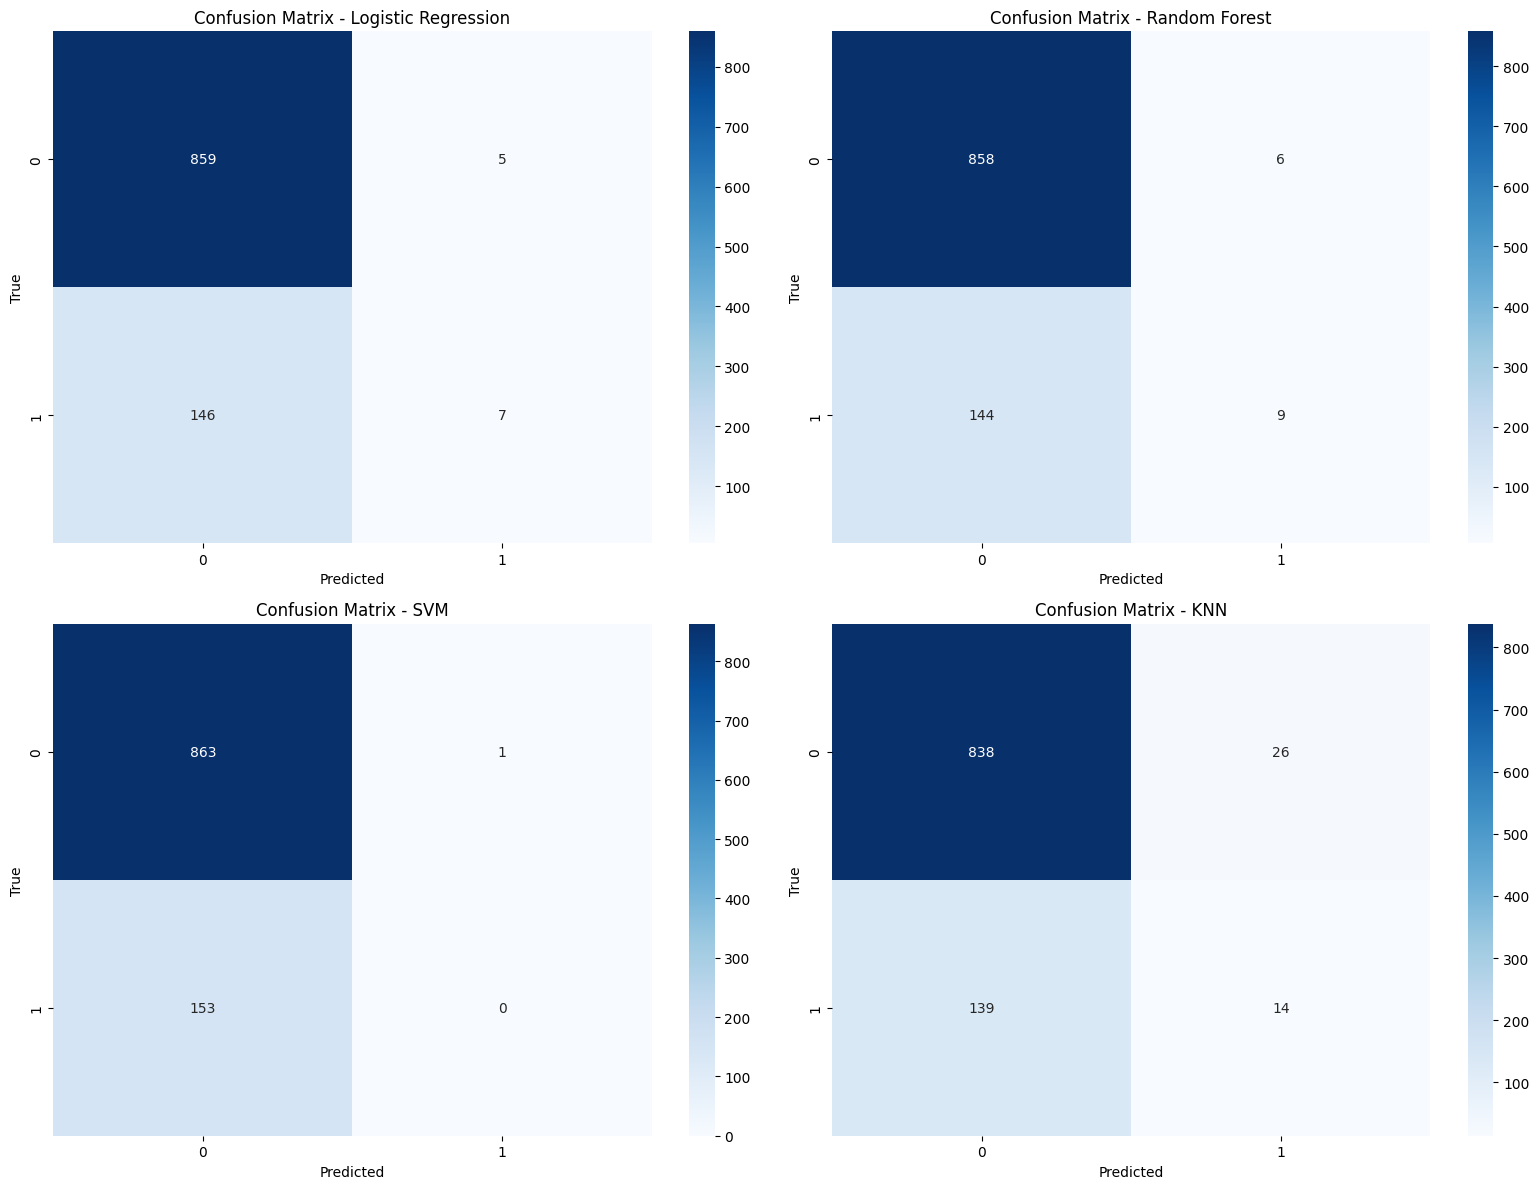

In [30]:
from sklearn.metrics import confusion_matrix
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}
# Create confusion matrices and plot
plt.figure(figsize=(16, 12))
for i, (name, clf) in enumerate(classifiers.items(), 1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.savefig("20.jpg")

plt.show()

In [31]:
try_data.to_csv('try_data.csv')

In [32]:
model = RandomForestClassifier(random_state=42)
model.fit(newX_train,newy_train)

RandomForestClassifier(random_state=42)

In [33]:
from sklearn.metrics import accuracy_score
x_train_pred = model.predict(newX_train)
training_data_acc_score = accuracy_score(x_train_pred, newy_train)
print(f"Accuracy score of the trainig data: {training_data_acc_score} ")

# Acc score for the test set
x_test_pred = model.predict(newX_test)
test_data_acc_score = accuracy_score(x_test_pred, newy_test)
print(f"Accuracy score of the testing data: {test_data_acc_score} ")

Accuracy score of the trainig data: 1.0 
Accuracy score of the testing data: 0.8891645988420182 


In [34]:
# input_data = (

# 0.6216216216216217,0.0,0.0,0.15006256882546237,0.0,0.0,0.0,1.0,0.42513641304819266,0.17179354846748207,0.32201030922353713,0.160851221127494,0.3279699669637781,0.9211535655323843
# )

inpnew = (40,1.0,1.0,5.0,0.0,0,0,0,209.0,130.0,84.5,39.94,77.0,104.0)
print(inpnew)
# input_data = (2.243839762031824,1.1024985367969258,-0.9239728626783157,-0.8012284316913048,-0.2440636233798023,16.36052158907737,1.3736154790335933,-0.19180536399919287,-2.9680531058255366,0.22010820112495177,0.6248750659603483,-0.18613730936508627,-0.6882563709775739,-0.6714359499032904)
input_data_as_numpy = np.asarray(inpnew)
input_data_reshaped = input_data_as_numpy.reshape(1,-1)
print(input_data_reshaped)
std = scale.transform(input_data_reshaped)
print(std)
pred = model.predict(std)
print(pred)
if pred[0]==1:
    print("sorry")
else:
    print("je")
# if 

(40, 1.0, 1.0, 5.0, 0.0, 0, 0, 0, 209.0, 130.0, 84.5, 39.94, 77.0, 104.0)
[[ 40.     1.     1.     5.     0.     0.     0.     0.   209.   130.
   84.5   39.94  77.   104.  ]]
[[0.21621622 1.         1.         0.08333333 0.         0.
  0.         0.         0.18711019 0.21987092 0.38624339 0.67196992
  0.36       0.18079096]]
[0]
je


c:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Classification Report:")

print(classification_report(newy_test,x_test_pred ))

print("Confusion Matrix:")

print(confusion_matrix(newy_test, x_test_pred ))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       605
           1       0.87      0.92      0.89       604

    accuracy                           0.89      1209
   macro avg       0.89      0.89      0.89      1209
weighted avg       0.89      0.89      0.89      1209

Confusion Matrix:
[[521  84]
 [ 50 554]]


In [36]:
import pickle

filename = 'modelHeart.sav'
pickle.dump(model, open(filename, 'wb'))

filename1 = 'scale.sav'
pickle.dump(scale, open(filename1, 'wb'))

In [37]:
# loading the saved model
loaded_model = pickle.load(open('modelHeart.sav', 'rb'))


loaded_scale = pickle.load(open('scale.sav', 'rb'))